In [58]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

0.0008512540013104993


<IPython.core.display.Javascript object>


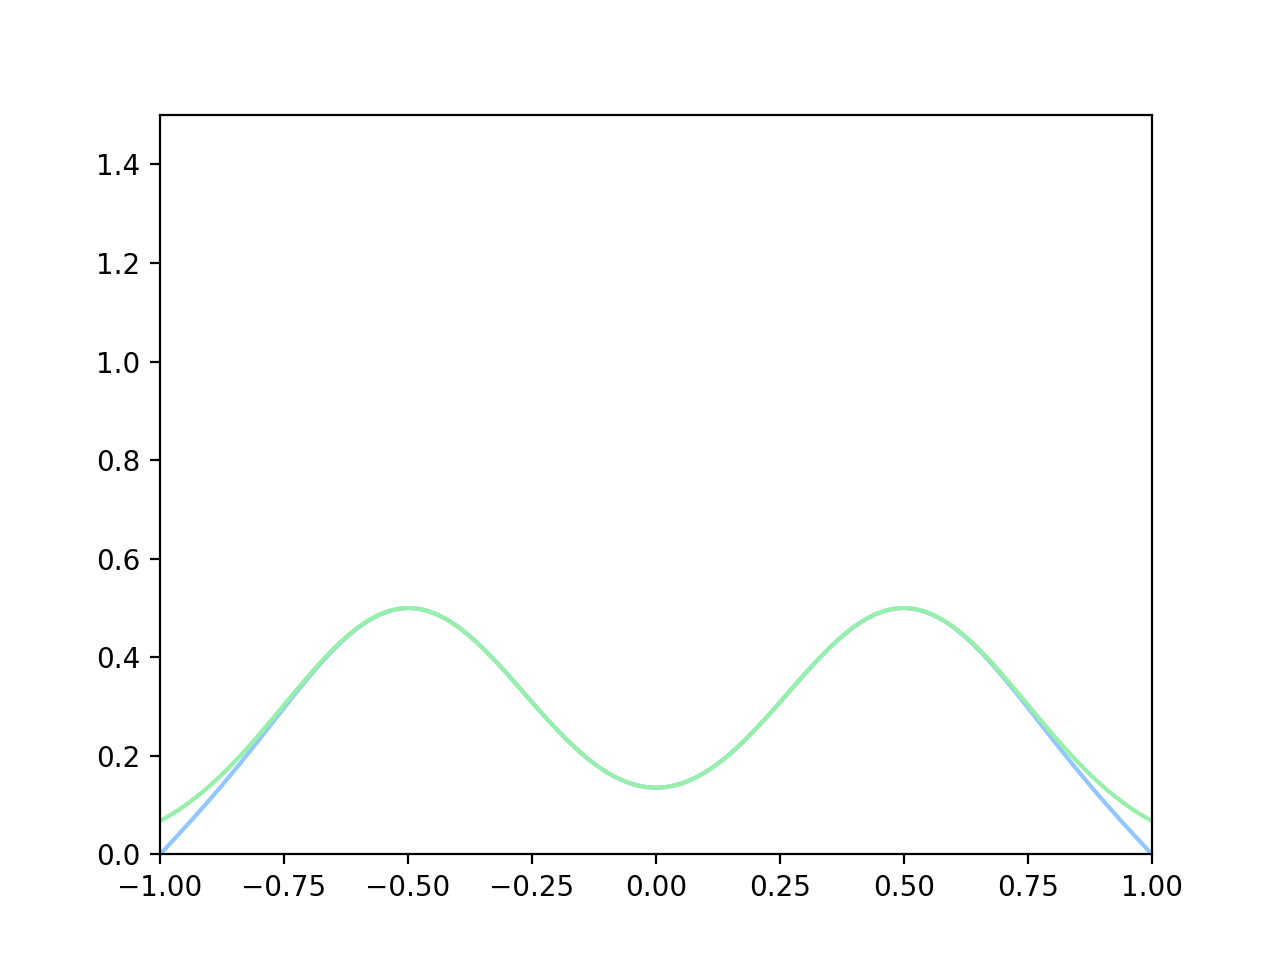

[[0.00033546 0.0004605  0.00062811 ... 0.00062811 0.0004605  0.00033546]
 [0.         0.00046083 0.00062854 ... 0.00062854 0.00046083 0.        ]
 [0.         0.00045658 0.00062984 ... 0.00062984 0.00045658 0.        ]
 ...
 [0.         0.021005   0.04215883 ... 0.04215883 0.021005   0.        ]
 [0.         0.02132488 0.04279497 ... 0.04279497 0.02132488 0.        ]
 [0.         0.02164704 0.04343519 ... 0.04343519 0.02164704 0.        ]]


In [109]:
#1-ая разностная схема
L = 1
T = 1
a = 0.25
N_z = 100
N_t = 200
c = 0.5
h = 2*L / N_x
tau = T / N_t
r = c * tau / h #  число Куранта
z = np.arange(-L, L+h, h)
t = np.arange(0, T+tau, tau)
fi = np.zeros(N_z)
#задаем функцию фи
fi = np.exp(-np.power(z, 2)/(2*a**2))
E = np.zeros([len(t), len(z)])
E[:][0] = fi
print(E[0][3])
E[len(t)-1][0] = 0
E[len(t) - 1][len(z) - 1] = 0
#аналитическое решение
E_analit = np.zeros([len(t), len(z)])
for n in range(len(t)):
    E_analit[n] = 0.5*(np.exp(-np.power(z - c*t[n], 2)/(2*a**2)) + np.exp(-np.power(z + c*t[n], 2)/(2*a**2)))

for j in range(1,len(z) - 1):
    E[1][j] = E[0][j] + (r**2 / 2) *(E[0][j+1] - 2 * E[0][j] + E[0][j-1])
for n in range(1, len(t)-1):
    for j in range(1, len(z)-1):
        E[n+1][j] = 2 * E[n][j] - E[n-1][j] + r**2*(E[n][j+1] - 2 * E[n][j] + E[n][j-1])
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(0, 1.5))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = z
    y1 = E[i]
    y2 = E_analit[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
print(E)
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=201, interval=5, blit=True, repeat = False)

In [106]:
print(z - c * t)
E_analit = np.zeros([len(t), len(z)])
for n in range(len(t)):
    E_analit[n] = 0.5*(np.exp(-np.power(z - c*t[n], 2)/(2*a**2)) + np.exp(-np.power(z + c*t[n], 2)/(2*a**2)))
print(E_analit)

[-1.    -0.985 -0.97  -0.955 -0.94  -0.925 -0.91  -0.895 -0.88  -0.865
 -0.85  -0.835 -0.82  -0.805 -0.79  -0.775 -0.76  -0.745 -0.73  -0.715
 -0.7   -0.685 -0.67  -0.655 -0.64  -0.625 -0.61  -0.595 -0.58  -0.565
 -0.55  -0.535 -0.52  -0.505 -0.49  -0.475 -0.46  -0.445 -0.43  -0.415
 -0.4   -0.385 -0.37  -0.355 -0.34  -0.325 -0.31  -0.295 -0.28  -0.265
 -0.25  -0.235 -0.22  -0.205 -0.19  -0.175 -0.16  -0.145 -0.13  -0.115
 -0.1   -0.085 -0.07  -0.055 -0.04  -0.025 -0.01   0.005  0.02   0.035
  0.05   0.065  0.08   0.095  0.11   0.125  0.14   0.155  0.17   0.185
  0.2    0.215  0.23   0.245  0.26   0.275  0.29   0.305  0.32   0.335
  0.35   0.365  0.38   0.395  0.41   0.425  0.44   0.455  0.47   0.485
  0.5  ]
[[0.00033546 0.0004605  0.00062811 ... 0.00062811 0.0004605  0.00033546]
 [0.00033647 0.00046182 0.00062983 ... 0.00062983 0.00046182 0.00033647]
 [0.00033949 0.0004658  0.00063502 ... 0.00063502 0.0004658  0.00033949]
 ...
 [0.06241516 0.07324488 0.08540532 ... 0.08540532 0.07324